<a href="https://colab.research.google.com/github/TanayRvp19/PROJECTS/blob/main/bitcoin_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
# for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#for model building 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

#for plotting
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))
print(df)


           Date          Open          High           Low         Close  \
0    2022-03-04  42458.140625  42479.613281  38805.847656  39137.605469   
1    2022-03-05  39148.449219  39566.335938  38777.035156  39400.585938   
2    2022-03-06  39404.199219  39640.175781  38211.648438  38419.984375   
3    2022-03-07  38429.304688  39430.226563  37260.203125  38062.039063   
4    2022-03-08  38059.902344  39304.441406  37957.386719  38737.269531   
..          ...           ...           ...           ...           ...   
361  2023-02-28  23521.837891  23585.384766  23077.650391  23147.353516   
362  2023-03-01  23150.929688  23880.632813  23088.626953  23646.550781   
363  2023-03-02  23647.019531  23739.138672  23245.021484  23475.466797   
364  2023-03-03  23476.632813  23479.347656  22213.238281  22362.679688   
365  2023-03-04  22362.894531  22404.998047  22314.826172  22363.744141   

        Adj Close       Volume  
0    39137.605469  28516271427  
1    39400.585938  16975917450  


In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427
1,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
3,2022-03-07,38429.304688,39430.226563,37260.203125,38062.039063,38062.039063,28546143503
4,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,25776583476


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
362,2023-03-01,23150.929688,23880.632813,23088.626953,23646.550781,23646.550781,24662841200
363,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
364,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
365,2023-03-04,22362.894531,22404.998047,22314.826172,22363.744141,22363.744141,17466841088


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,24966.653011,25423.755934,24441.538902,24911.675184,24911.675184,2.944382e+10
std,8493.300552,8658.313057,8285.523977,8445.446701,8445.446701,1.236929e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,19326.514648,19636.722168,19025.690430,19325.394043,19325.394043,2.214887e+10
50%,21616.620118,21894.912110,21084.220703,21619.246094,21619.246094,2.771707e+10
75%,29238.320312,30006.970703,28717.442383,29175.282715,29175.282715,3.375638e+10
max,47456.898438,48086.835938,47100.437500,47465.730469,47465.730469,1.189925e+11


In [ ]:
print('NULL VALUES:', df.isnull().values.sum())

NULL VALUES: 0


In [ ]:
print('NA values:', df.isnull().values.any())

NA values: False


In [ ]:
df.shape

(366, 7)

In [ ]:
#exploratory data analysis

sd=df.iloc[0][0]
ed=df.iloc[-1][0]

In [ ]:
print('starting date',sd)
print('ending date',ed)

starting date 2022-03-04
ending date 2023-03-04


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2022 = df.loc[(df['Date'] >= '2022-03-04')
                     & (df['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469
1,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938
2,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375
3,2022-03-07,38429.304688,39430.226563,37260.203125,38062.039063
4,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531
...,...,...,...,...,...
297,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688
298,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
299,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
300,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797


In [ ]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,41681.653042,41793.672154
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='yellow'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
#overall analysis

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2022-03-04')
                     & (df['Date'] <= '2023-03-04')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469
1,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938
2,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375
3,2022-03-07,38429.304688,39430.226563,37260.203125,38062.039063
4,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531
...,...,...,...,...,...
361,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516
362,2023-03-01,23150.929688,23880.632813,23088.626953,23646.550781
363,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797
364,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,39366.367554,39439.726929
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
#LSTM building

closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (366, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2022-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] > '2022-12-03']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  91


In [ ]:
closedf

,Date,Close
275,2022-12-04,17130.486328
276,2022-12-05,16974.826172
277,2022-12-06,17089.503906
278,2022-12-07,16848.126953
279,2022-12-08,17233.474609
...,...,...
361,2023-02-28,23147.353516
362,2023-03-01,23646.550781
363,2023-03-02,23475.466797
364,2023-03-03,22362.679688


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#normalizing

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(91, 1)


In [ ]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (54, 1)
test_data:  (37, 1)


In [ ]:
#transform close price using time series analysis
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (38, 15)
y_train:  (38,)
X_test:  (21, 15)
y_test (21,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (38, 15, 1)
X_test:  (21, 15, 1)


In [ ]:
#actual model building

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
2/2 [==============================] - 5s 713ms/step - loss: 0.2033 - val_loss: 1.0084
Epoch 2/200
2/2 [==============================] - 0s 121ms/step - loss: 0.1980 - val_loss: 0.9823
Epoch 3/200
2/2 [==============================] - 0s 69ms/step - loss: 0.1930 - val_loss: 0.9576
Epoch 4/200
2/2 [==============================] - 0s 79ms/step - loss: 0.1880 - val_loss: 0.9338
Epoch 5/200
2/2 [==============================] - 0s 65ms/step - loss: 0.1834 - val_loss: 0.9104
Epoch 6/200
2/2 [==============================] - 0s 87ms/step - loss: 0.1789 - val_loss: 0.8879
Epoch 7/200
2/2 [==============================] - 0s 129ms/step - loss: 0.1753 - val_loss: 0.8681
Epoch 8/200
2/2 [==============================] - 0s 79ms/step - loss: 0.1713 - val_loss: 0.8511
Epoch 9/200
2/2 [==============================] - 0s 98ms/step - loss: 0.1680 - val_loss: 0.8356
Epoch 10/200
2/2 [==============================] - 0s 86ms/step - loss: 0.1650 - val_loss: 0.8205
Epoch 11/200
2/2

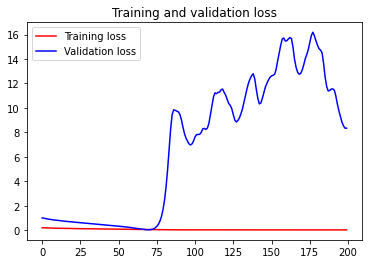

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

1/1 [==============================] - 0s 25ms/step


((38, 1), (21, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1334.59984245838
Train data MSE:  1781156.7394899323
Train data MAE:  1188.0938013684213
-------------------------------------------------------------------------------------
Test data RMSE:  24233.453818248854
Test data MSE:  587260283.9611999
Test data MAE:  22441.45033463095


In [ ]:
#variance regression score

print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.6890016035682749
Test data explained variance regression score: -92.43887089065642


In [ ]:
#R squared score regression

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.688869427057941
Test data R2 score: -655.0484718369555


In [ ]:
#mean gamma and mean poisson deviance

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (91, 1)
Test predicted data:  (91, 1)


In [ ]:
#prediction for next 30 days

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()